In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd
import tools

In [2]:
fits_image_filename = 'COSMOS2020/COSMOS2020_Farmer_processed.fits'
table = fits.open(fits_image_filename)

In [3]:
df = pd.DataFrame(table[1].data)

In [9]:
def find_column_names(dataframe, suffix):

    column_names = list(dataframe.columns.values)
    bands = ['HSC_g', 'HSC_r', 'HSC_i', 'HSC_z', 'HSC_y', 'CFHT_u']
    extra_columns = ['photoz']

    useful_column_names = []
    for name in column_names:
        for band in bands:
            if band+suffix == name:
                useful_column_names.append(name)

    for name in extra_columns:
        useful_column_names.append(name)

    return useful_column_names

magnitude_columns = find_column_names(df, '_MAG')
magnitudes_df = df[magnitude_columns]
magnitudes_df = magnitudes_df.dropna(axis=0, how='any')
magnitudes_df

,CFHT_u_MAG,HSC_g_MAG,HSC_r_MAG,HSC_i_MAG,HSC_z_MAG,HSC_y_MAG,photoz
0,26.018664,25.948240,25.847682,25.948665,25.843794,25.550467,1.5930
1,27.662139,27.319395,26.897895,26.920765,26.889973,27.241476,0.1151
3,27.929820,27.698644,27.406737,26.694779,26.381213,26.375692,0.0177
4,26.543227,25.869387,25.757125,25.962073,26.015479,26.124913,2.8698
5,27.764725,28.033576,27.592892,27.621111,27.500100,27.001082,1.5139
...,...,...,...,...,...,...,...
746949,23.315723,21.615083,20.331946,19.798238,19.514017,19.316491,0.3275
746951,25.455152,24.480574,23.787192,23.455760,23.281229,23.210910,0.3230
746953,23.636080,23.328989,23.157774,22.643604,22.465635,22.210020,1.2587
746954,23.548393,23.546997,23.363609,23.217424,23.491623,23.411288,0.5593


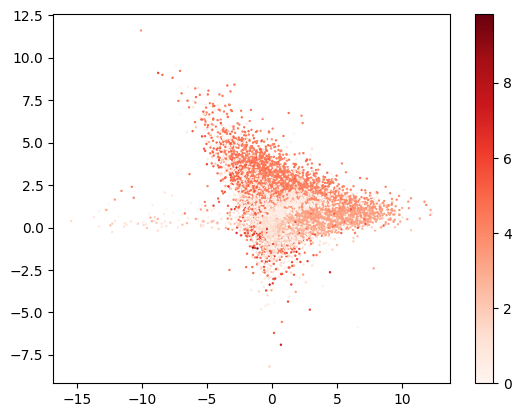

In [15]:
data_array = np.array(magnitudes_df)
photometry = np.array(data_array)[:, :-1]
redshifts = data_array[:, -1]
colours = tools.calculate_colours(photometry)
umg = colours[:, 0]
gmr = colours[:, 1]
plt.scatter(umg, gmr, s=0.5, c=redshifts, cmap='Reds')
plt.colorbar()

(array([7.8697e+04, 6.8934e+04, 5.3260e+04, 5.6729e+04, 6.3812e+04,
        4.8545e+04, 4.6577e+04, 3.8111e+04, 2.7275e+04, 3.2344e+04,
        2.1548e+04, 1.9853e+04, 2.2568e+04, 1.7684e+04, 1.6246e+04,
        1.5090e+04, 1.2525e+04, 1.2510e+04, 1.0400e+04, 1.0939e+04,
        8.4370e+03, 6.9000e+03, 5.2200e+03, 5.4240e+03, 5.1630e+03,
        3.6070e+03, 2.3240e+03, 1.3650e+03, 9.3700e+02, 1.0120e+03,
        8.0000e+02, 4.2500e+02, 2.1500e+02, 2.4900e+02, 3.7500e+02,
        3.7600e+02, 2.4800e+02, 1.6700e+02, 9.1000e+01, 1.1100e+02,
        1.0900e+02, 1.4100e+02, 1.1400e+02, 1.0700e+02, 1.5300e+02,
        1.7700e+02, 1.7600e+02, 9.4000e+01, 7.6000e+01, 7.1000e+01]),
 array([0.     , 0.19985, 0.3997 , 0.59955, 0.7994 , 0.99925, 1.1991 ,
        1.39895, 1.5988 , 1.79865, 1.9985 , 2.19835, 2.3982 , 2.59805,
        2.7979 , 2.99775, 3.1976 , 3.39745, 3.5973 , 3.79715, 3.997  ,
        4.19685, 4.3967 , 4.59655, 4.7964 , 4.99625, 5.1961 , 5.39595,
        5.5958 , 5.79565, 5.9955 ,

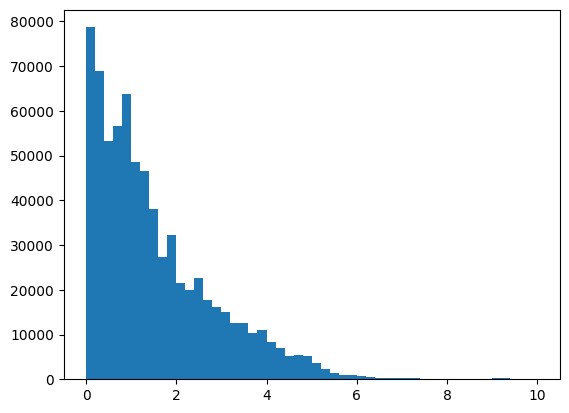

In [8]:
plt.hist(df['photoz'].dropna(), bins=50)